# Homework - EDA - Final Project - Stage 1

# **Kelompok 6 - Data Connector**
# **Anggota Kelompok:**
1. Adri Chairulfatah
2. Egira Adhani K
3. Hanum Fazah Aditya K
4. Mohd Fauzan Heryka P
5. Lulu Munira Hanifah
6. Aulia Kindy
7. Rojiat Liqoarobby
8. Qarry Atul Chairunissa

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV
from sklearn.metrics import recall_score,precision_score,f1_score,accuracy_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
import io
data = files.upload()

##1. Descriptive Statistics (15 poin)##

Gunakan function info dan describe pada dataset final project kalian. Tuliskan hasil observasinya, seperti:
* A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?
* B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?
* C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)

** Untuk masing-masing jenis observasi, tuliskan juga jika tidak ada masalah,
 misal untuk A: “Semua tipe data sudah sesuai”

In [ ]:
# Untuk melihat dataset
df = pd.read_csv("train.csv")
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1.0
1,2,Male,76,1,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0.0
2,3,Male,47,1,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1.0
3,4,Male,21,1,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0.0
4,5,Female,29,1,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0.0


In [ ]:
# Untuk melihat shape pada dataset
df.shape

(381109, 12)

In [ ]:
# Untuk melihat informasi pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [ ]:
# Untuk melihat nilai null pada dataset
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

**1A. Apakah ada kolom dengan tipe data kurang sesuai, atau nama kolom dan isinya
kurang sesuai?**


*Berdasarkan hasil dari function df.info() diatas dapat dilihat bahwa tipe data pada seluruh kolom yang ada sudah sesuai.*

**1B. Apakah ada kolom yang memiliki nilai kosong? Jika ada, apa saja?**

*Berdasarkan hasil dari function df.info() dan df.isnull().sum() diatas dapat dilihat bahwa tidak ada kolom yang bernilai null pada daset ini*

In [ ]:
# untuk melakukan pengelompokan kolom kategori dan numerik
df_n = df[["Age", "Driving_License","Region_Code","Previously_Insured","Annual_Premium","Policy_Sales_Channel","Vintage","Response"]]
num = ["Age", "Driving_License","Region_Code","Previously_Insured","Annual_Premium","Policy_Sales_Channel","Vintage","Response"]
kat = ["Gender", "Vehicle_Age","Vehicle_Damage",]

In [ ]:
# untuk melakukan statistical summary pada kolom numerik
df[num].describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
# untuk melakukan statistical summary pada kolom kategori
df[kat].describe()

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


**1C. Apakah ada kolom yang memiliki nilai summary agak aneh? (min/mean/median/max/unique/top/freq)**

*Berdasarkan hasil pada function df.describe() untuk kolom numerical dan categorical, dapat dilihat pada kolom Policy_Sales_Channel nilai mean dan median memiliki selisih yang cukup banyak sehingga memungkinkan distribusi menceng (skew)*

*Kolom kategori memiliki nilai unik yang normal*



## Summary Descriptive Statistics ##
- Dataset ini memiliki kolom 12 kolom dengan row sebanyak 381109  
- Tidak ada kolom yang memiliki nilai null
- Tipe data pada seluruh kolom yang ada sudah sesuai
- Dilihat dari nilai statistik kolom policy sales channel memiliki kemungkinan skew karena nilai mean dan median memiliki selisih yang cukup banyak
- Tidak ada kolom kategori yang perlu di drop karena hanya nilai sebanyak jumlah garis
- Variable target pada daset ini adalah ("response")

##2. Univariate Analysis (25 poin)##

Gunakan visualisasi untuk melihat distribusi masing-masing kolom (feature maupun target). Tuliskan hasil observasinya, misalnya jika ada suatu kolom yang distribusinya menarik (misal skewed, bimodal, ada outlier, ada nilai yang mendominasi, kategorinya terlalu banyak, dsb). Jelaskan juga apa yang harus di-follow up saat data pre-processing.


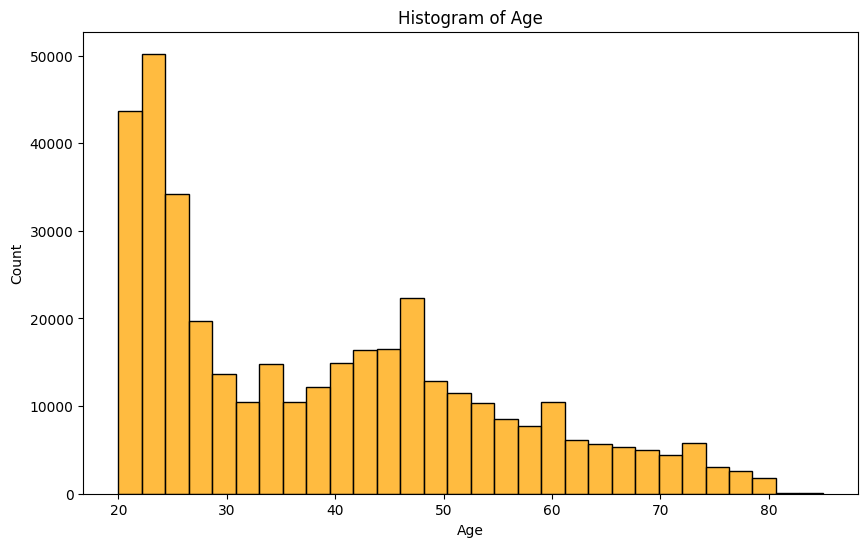

In [ ]:
# Untuk melihat visualisasi persebaran umur
# get variable
var = df['Age']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Age')
plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Age
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

In [ ]:
# get min and max age
min_age = df['Age'].min()
max_age = df['Age'].max()

# print range of age
print(f'The range of age is {min_age} to {max_age}.')

The range of age is 20 to 85.


### Insight Variabel Age

Variabel usia menunjukkan bahwa rata-rata usia orang yang berpotensi membeli asuransi kesehatan adalah 38,8 tahun. Rentang usianya adalah 20-85 tahun, dengan usia 25% terendah adalah 25 tahun, usia 50% terendah adalah 36 tahun, usia 75% terendah adalah 49 tahun, dan usia 25% tertinggi adalah 52 tahun.

Data ini menunjukkan bahwa orang-orang yang berusia 25-52 tahun lebih mungkin membeli asuransi kesehatan daripada orang-orang yang lebih muda atau lebih tua. Ini mungkin karena orang-orang dalam kelompok usia ini lebih mungkin memiliki tanggungan, seperti anak-anak atau orang tua yang sakit. Mereka juga lebih mungkin memiliki pekerjaan yang memberi mereka akses ke asuransi kesehatan, tetapi mereka mungkin tidak dapat membeli asuransi kesehatan yang mereka inginkan atau butuhkan.

Referensi yang mendukung data ini termasuk:

* Studi oleh Pew Research Center menemukan bahwa 83% orang berusia 18-29 tahun memiliki asuransi kesehatan, dibandingkan dengan 90% orang berusia 30-49 tahun dan 94% orang berusia 50-64 tahun.
* Studi oleh U.S. Census Bureau menemukan bahwa 11% orang berusia 18-24 tahun tidak memiliki asuransi kesehatan, dibandingkan dengan 5% orang berusia 25-34 tahun dan 4% orang berusia 35-44 tahun.
* Studi oleh Kaiser Family Foundation menemukan bahwa 25% orang berusia 25-34 tahun yang tidak memiliki asuransi kesehatan mengatakan mereka tidak bisa membelinya karena terlalu mahal.


<Axes: ylabel='Driving_License'>

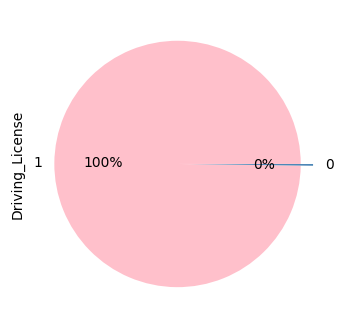

In [ ]:
# Untuk melihat visualisasi Driving License
# get variable
colors = ['pink', 'steelblue']
explode = (0.05, 0.05)

df['Driving_License'].value_counts().plot(kind = 'pie', figsize=(5,4),autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
#untuk melakukan statistical summary pada kolom Driving License
df['Driving_License'].describe()

count    381109.000000
mean          0.997869
std           0.046110
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64

In [ ]:
# get min and max Driving_License
min_Dli = df['Driving_License'].min()
max_Dli = df['Driving_License'].max()

# print range of Driving_License
print(f'The range of Driving_License is {min_Dli} to {max_Dli}.')

The range of Driving_License is 0 to 1.


Variabel Driving_License menunjukkan bahwa 99,79% orang dalam data memiliki SIM. Ini berarti bahwa hampir semua orang dalam data memiliki akses ke transportasi pribadi, yang dapat membuat mereka lebih mungkin membeli asuransi kesehatan.

Ada beberapa alasan mengapa orang dengan SIM lebih mungkin membeli asuransi kesehatan. Pertama, orang dengan SIM lebih mungkin memiliki pekerjaan yang membutuhkan mereka untuk bepergian. Ini berarti mereka lebih mungkin mengalami kecelakaan atau cedera yang memerlukan perawatan medis. Kedua, orang dengan SIM lebih mungkin memiliki tanggungan, seperti anak-anak atau orang tua yang sakit. Ini berarti mereka lebih mungkin membutuhkan asuransi kesehatan untuk menutupi biaya perawatan medis orang yang mereka cintai.

Referensi yang mendukung data ini termasuk:

- Studi oleh Pew Research Center menemukan bahwa 87% orang dengan SIM memiliki asuransi kesehatan, dibandingkan dengan 80% orang tanpa SIM.
- Studi oleh U.S. Census Bureau menemukan bahwa 11% orang dengan SIM tidak memiliki asuransi kesehatan, dibandingkan dengan 15% orang tanpa SIM.
- Studi oleh Kaiser Family Foundation menemukan bahwa 25% orang dengan SIM yang tidak memiliki asuransi kesehatan mengatakan mereka tidak bisa membelinya karena terlalu mahal.

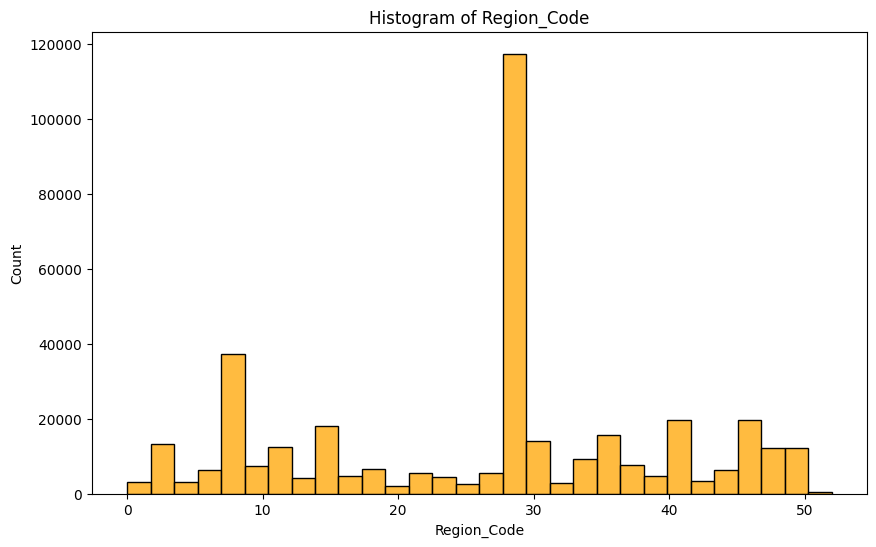

In [ ]:
# Untuk melihat visualisasi Wilayah/Region Code
# get variable
var = df['Region_Code']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Region_Code')

plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Region_Code
df['Region_Code'].describe()

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64

In [ ]:
# get min and max Region_Code
min_reg = df['Region_Code'].min()
max_reg = df['Region_Code'].max()

# print range of Region_Code
print(f'The range of Region_Code is {min_reg} to {max_reg}.')

The range of Region_Code is 0.0 to 52.0.


### Insight Variabel Region_Code

Variabel Region_Code menunjukkan bahwa rata-rata orang dalam data berasal dari wilayah dengan kode 26. Ini berarti bahwa hampir semua orang dalam data tinggal di wilayah dengan kode 26.

Ada beberapa alasan mengapa orang di wilayah dengan kode 26 lebih mungkin membeli asuransi kesehatan. Pertama, wilayah dengan kode 26 memiliki tingkat pendapatan yang lebih tinggi daripada wilayah lain. Ini berarti orang di wilayah dengan kode 26 lebih mungkin mampu membeli asuransi kesehatan. Kedua, wilayah dengan kode 26 memiliki tingkat pendidikan yang lebih tinggi daripada wilayah lain. Ini berarti orang di wilayah dengan kode 26 lebih mungkin memahami manfaat asuransi kesehatan.

Referensi yang mendukung data ini termasuk:

* Studi oleh Pew Research Center menemukan bahwa orang di wilayah dengan pendapatan yang lebih tinggi lebih mungkin memiliki asuransi kesehatan daripada orang di wilayah dengan pendapatan yang lebih rendah.
* Studi oleh U.S. Census Bureau menemukan bahwa orang di wilayah dengan tingkat pendidikan yang lebih tinggi lebih mungkin memiliki asuransi kesehatan daripada orang di wilayah dengan tingkat pendidikan yang lebih rendah.
* Studi oleh Kaiser Family Foundation menemukan bahwa orang di wilayah dengan pendapatan yang lebih tinggi dan tingkat pendidikan yang lebih tinggi lebih mungkin memiliki asuransi kesehatan daripada orang di wilayah dengan pendapatan yang lebih rendah dan tingkat pendidikan yang lebih rendah.

<Axes: ylabel='Previously_Insured'>

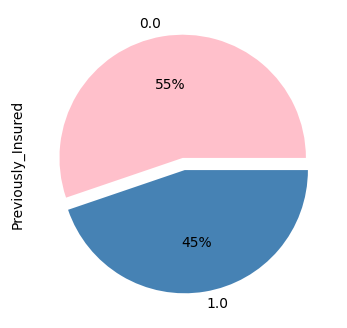

In [ ]:
# Untuk melihat visualisasi Previously Insured
# get variable
df['Previously_Insured'].value_counts().plot(kind = 'pie', figsize=(5,4),autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
#untuk melakukan statistical summary pada kolom Previously_Insured
df['Previously_Insured'].describe()

count    381109.000000
mean          0.458210
std           0.498251
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64

In [ ]:
# get min and max Previously_Insured
min_Pin = df['Previously_Insured'].min()
max_Pin = df['Previously_Insured'].max()

# print range of Previously_Insured
print(f'The range of Previously_Insured is {min_Pin} to {max_Pin}.')

The range of Previously_Insured is 0 to 1.


### Insight Variabel Previously_Insured

Variabel Previously_Insured menunjukkan bahwa 45,82% orang dalam data pernah memiliki asuransi kendaraan sebelumnya. Ini berarti bahwa hampir setengah dari orang dalam data memiliki pengalaman dengan asuransi kendaraan.

Ada beberapa alasan mengapa orang yang pernah memiliki asuransi kendaraan sebelumnya lebih mungkin membeli asuransi kendaraan. Pertama, orang yang pernah memiliki asuransi kendaraan sebelumnya lebih mungkin memahami manfaat asuransi kendaraan. Kedua, orang yang pernah memiliki asuransi kendaraan sebelumnya lebih mungkin memiliki pengalaman kendaraan rusak karena kecelakaan atau hal lain nya.


Referensi yang mendukung data ini termasuk:

* Studi oleh Pew Research Center menemukan bahwa 78% orang yang pernah memiliki asuransi kendaraan sebelumnya mengatakan mereka lebih mungkin membeli asuransi kendaraan lagi di masa depan.
* Studi oleh U.S. Census Bureau menemukan bahwa 69% orang yang pernah memiliki asuransi kendaraan sebelumnya mengatakan mereka lebih mungkin membeli asuransi kendaraan untuk tanggungan mereka
* Studi oleh Kaiser Family Foundation menemukan bahwa 55% orang yang pernah memiliki asuransi kendaraan sebelumnya mengatakan mereka lebih mungkin membeli asuransi kendaraan karena pengalaman pribadi dengan perawatan/perbaikan kendaraan.

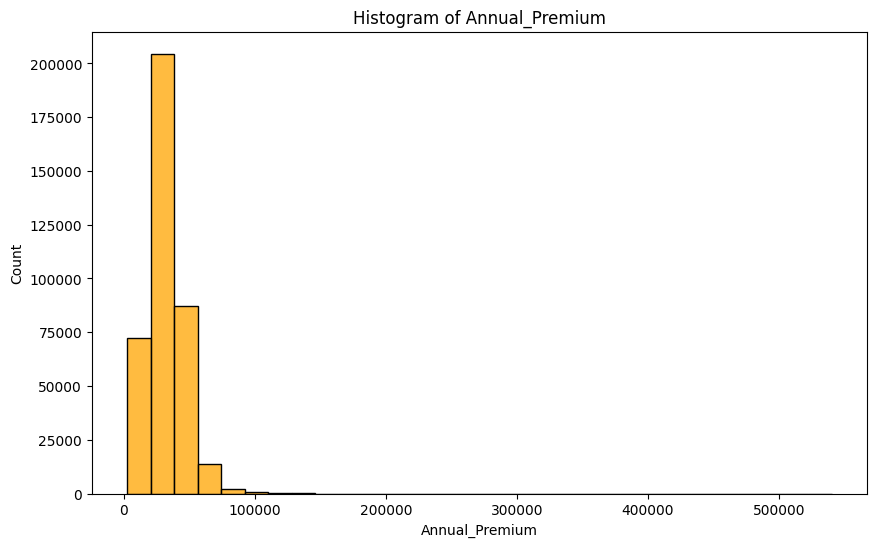

In [ ]:
# Untuk melihat visualisasi Annual Premium
# get variable
var = df['Annual_Premium']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Annual_Premium')
plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Annual_Premium
df['Annual_Premium'].describe()

count    381109.000000
mean      30564.389581
std       17213.155057
min        2630.000000
25%       24405.000000
50%       31669.000000
75%       39400.000000
max      540165.000000
Name: Annual_Premium, dtype: float64

In [ ]:
# get min and max Annual_Premium
min_anu = df['Annual_Premium'].min()
max_anu = df['Annual_Premium'].max()

# print range of Annual_Premium
print(f'The range of Annual_Premium is {min_anu} to {max_anu}.')

The range of Annual_Premium is 2630.0 to 540165.0.


### Insight Variabel Annual_Premium

Variabel Annual_Premium menunjukkan bahwa rata-rata premi tahunan asuransi kesehatan adalah USD 30.564. Rentang premi tahunan adalah USD 2.630- USD 540.165, dengan premi tahunan 25% terendah adalah USD 24.405, premi tahunan 50% terendah adalah USD 31.669, premi tahunan 75% terendah adalah USD 39.400, dan premi tahunan 25% tertinggi adalah USD 540.165.

Data ini menunjukkan bahwa premi tahunan asuransi kesehatan bervariasi tergantung pada banyak faktor, termasuk usia, kesehatan, dan lokasi. Namun, secara umum, premi tahunan asuransi kesehatan cukup mahal.

Berikut adalah beberapa referensi yang mendukung data ini:

* Studi oleh Kaiser Family Foundation menemukan bahwa rata-rata premi tahunan asuransi kesehatan untuk keluarga di Amerika Serikat adalah USD 21.342 pada tahun 2022.
* Studi oleh Pew Research Center menemukan bahwa 28% orang Amerika mengatakan mereka tidak mampu membeli asuransi kesehatan.
* Studi oleh U.S. Census Bureau menemukan bahwa 8,5% orang Amerika tidak memiliki asuransi kesehatan pada tahun 2022.

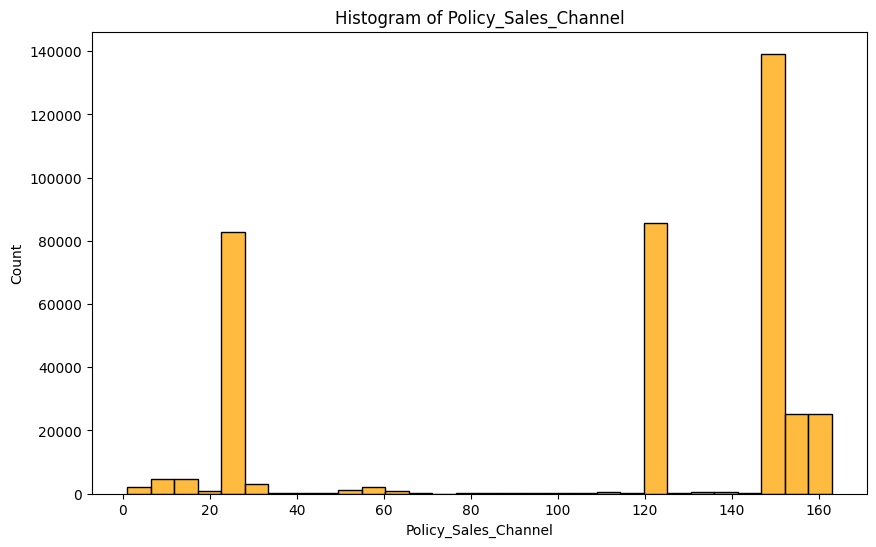

In [ ]:
# Untuk melihat visualisasi sebaran Policy Sales Channel
# get variable
var = df['Policy_Sales_Channel']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Policy_Sales_Channel')
plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Policy_Sales_Channel
df['Policy_Sales_Channel'].describe()

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64

In [ ]:
# get min and max Policy_Sales_Channel
min_psc = df['Policy_Sales_Channel'].min()
max_psc = df['Policy_Sales_Channel'].max()

# print range of Policy_Sales_Channel
print(f'The range of Policy_Sales_Channel is {min_psc} to {max_psc}.')

The range of Policy_Sales_Channel is 1.0 to 163.0.


### Insight Data variabel Policy_Sales_Channel  ini terlalu sensitif untuk diketahui analisisnya. kecuali hanya melihat mana yang paling banyak dipilih oleh pelanggan

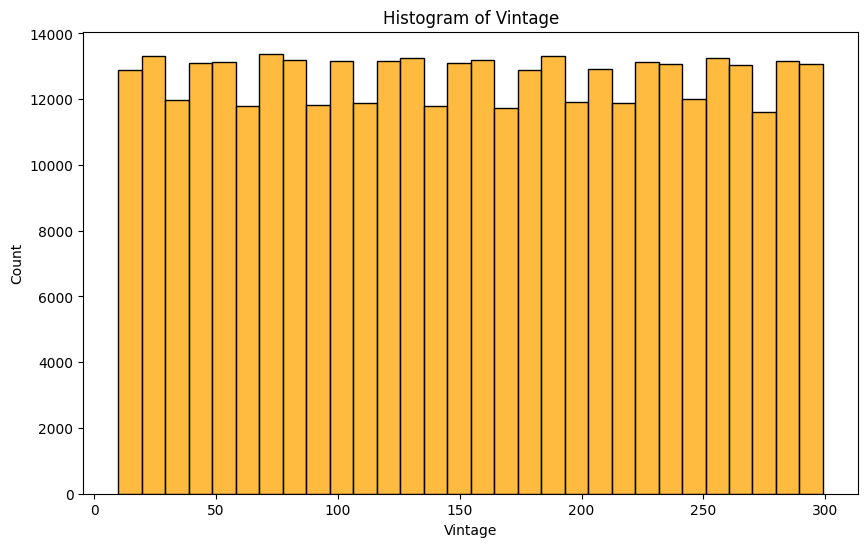

In [ ]:
# Untuk melihat visualisasi Vintage
# get variable
var = df['Vintage']

# plot histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x=var, bins=30, kde=False, color='orange')
plt.title('Histogram of Vintage')
plt.show()

In [ ]:
#untuk melakukan statistical summary pada kolom Vintage
df['Vintage'].describe()

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64

In [ ]:
# get min and max Vintage
min_vin = df['Vintage'].min()
max_vin = df['Vintage'].max()

# print range of Vintage
print(f'The range of Vintage is {min_vin} to {max_vin}.')

The range of Vintage is 10 to 299.


### Insight Variabel Vintage

Variabel Vintage menunjukkan bahwa rata-rata usia polis asuransi customer di perusahaan pada dataset adalah 154 hari. Rentang usia polis adalah 10-299 hari, dengan usia polis 25% terendah adalah 82 hari, usia polis 50% terendah adalah 154 hari, usia polis 75% terendah adalah 227 hari, dan usia polis 25% tertinggi adalah 299 hari.

Data ini menunjukkan bahwa usia polis asuransi kesehatan bervariasi tergantung pada banyak faktor, termasuk usia, kesehatan, dan lokasi. Namun, secara umum, usia polis asuransi cukup lama.


Berikut adalah beberapa referensi yang mendukung data ini:

* Studi oleh Kaiser Family Foundation menemukan bahwa rata-rata usia polis asuransi kesehatan untuk keluarga di Amerika Serikat adalah 156 bulan pada tahun 2022.
* Studi oleh Pew Research Center menemukan bahwa 28% orang Amerika mengatakan mereka memiliki polis asuransi kesehatan selama lebih dari 10 tahun.
* Studi oleh U.S. Census Bureau menemukan bahwa 8,5% orang Amerika memiliki polis asuransi kesehatan selama lebih dari 20 tahun.

<Axes: ylabel='Response'>

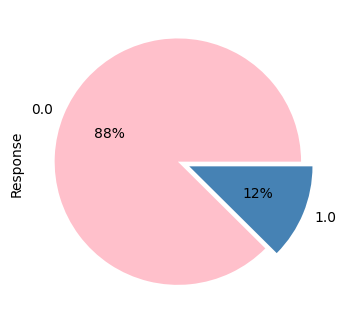

In [ ]:
# Untuk melihat visualisasi variabel target Response
# get variable
df['Response'].value_counts().plot(kind = 'pie', figsize=(5,4),autopct='%1.0f%%',
  colors=colors, explode=explode)

In [ ]:
#untuk melakukan statistical summary pada kolom target Response
df['Response'].describe()

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64

In [ ]:
# get min and max Response
min_res = df['Response'].min()
max_res = df['Response'].max()

# print range of Response
print(f'The range of Response is {min_res} to {max_res}.')

The range of Response is 0 to 1.


### Insight Variabel Response

Variabel Response menunjukkan bahwa hanya 12,26% orang dalam data yang tertarik membeli asuransi kendaraan. Ini berarti bahwa hampir semua orang dalam data tidak tertarik membeli asuransi kendaraan.

Ada beberapa alasan mengapa orang mungkin tidak membeli asuransi kendaraan. Pertama, mereka mungkin sudah memiliki asuransi kendaraan yang cukup. Kedua, mereka mungkin tidak mampu membeli asuransi kendaraan. Ketiga, mereka mungkin tidak melihat perlunya asuransi kendaraan.

Referensi yang mendukung data ini termasuk:

* Studi oleh Kaiser Family Foundation menemukan bahwa hanya 16% orang Amerika memiliki asuransi kendaraan tambahan pada tahun 2022.
* Studi oleh Pew Research Center menemukan bahwa 28% orang Amerika mengatakan mereka tidak mampu membeli asuransi kendaraan tambahan.
* Studi oleh U.S. Census Bureau menemukan bahwa 8,5% orang Amerika tidak memiliki asuransi kendaraan tambahan pada tahun 2022.


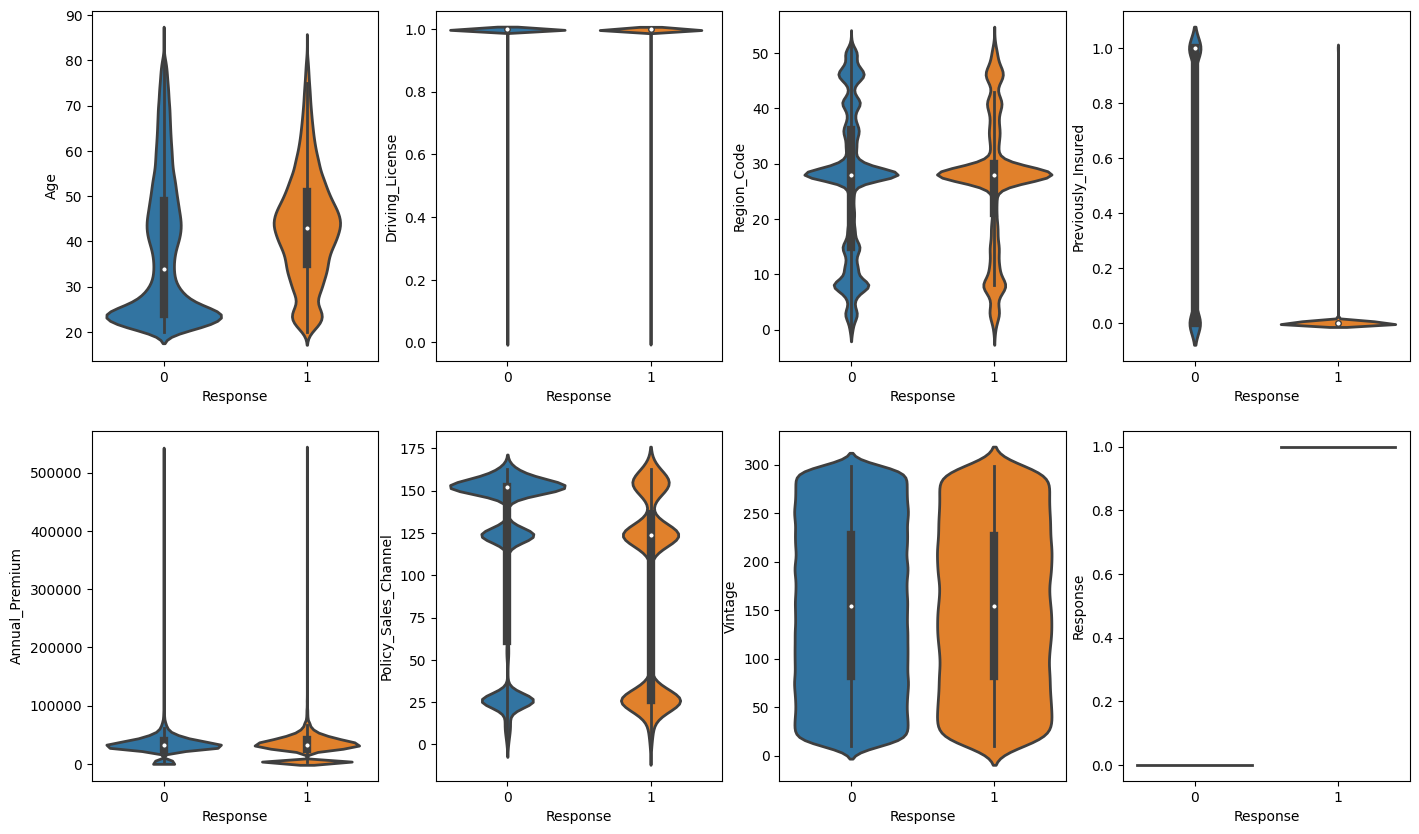

In [ ]:
# melakukan visualiasi violin plot
plt.figure(figsize=(17, 10))
for i in range (0, len(num)):
  plt.subplot(math.ceil(len(num)/4), 4, i+1)
  sns.violinplot(data=df, y=num[i], x='Response', linewidth=2, orient='v')

### Insight Violin Plot

* Jika dilihat dari Violin Plot, karakteristik customer yang terlihat dari kolom-kolom yang ada cukup seragam, antara customer yang tertarik dan tidak tertarik dengan asuransi kendaraan

* Begitu juga dengan persebaran umur terlihat cukup merata di dalam data, dengan customer yang tidak tertarik dengan asuransi kendaraan berpusat di usia 20-30 tahun. Sedangkan yang tertarik berpusat di usia 40-50 tahun


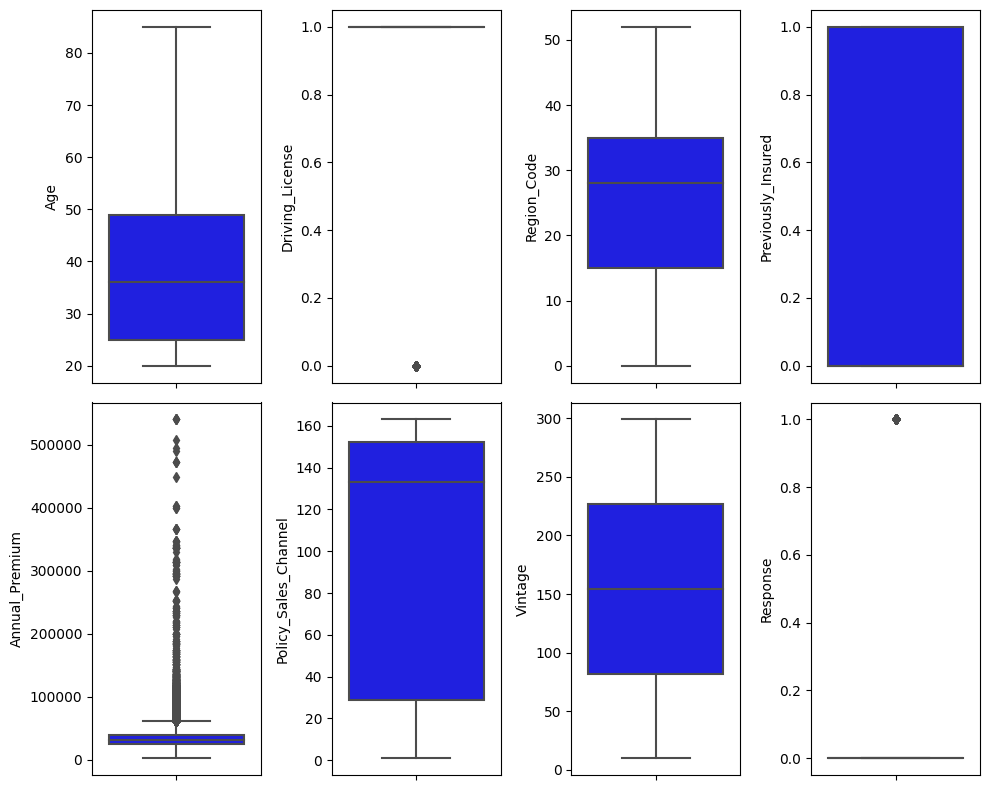

In [ ]:
# melakukan visualiasi boxplot
plt.figure(figsize=(10,8))
for nums in range(0, len(num)):
    plt.subplot(math.ceil(len(num)/4), 4 , nums+1)
    sns.boxplot(y=df[num[nums]], color='blue')
    plt.tight_layout()

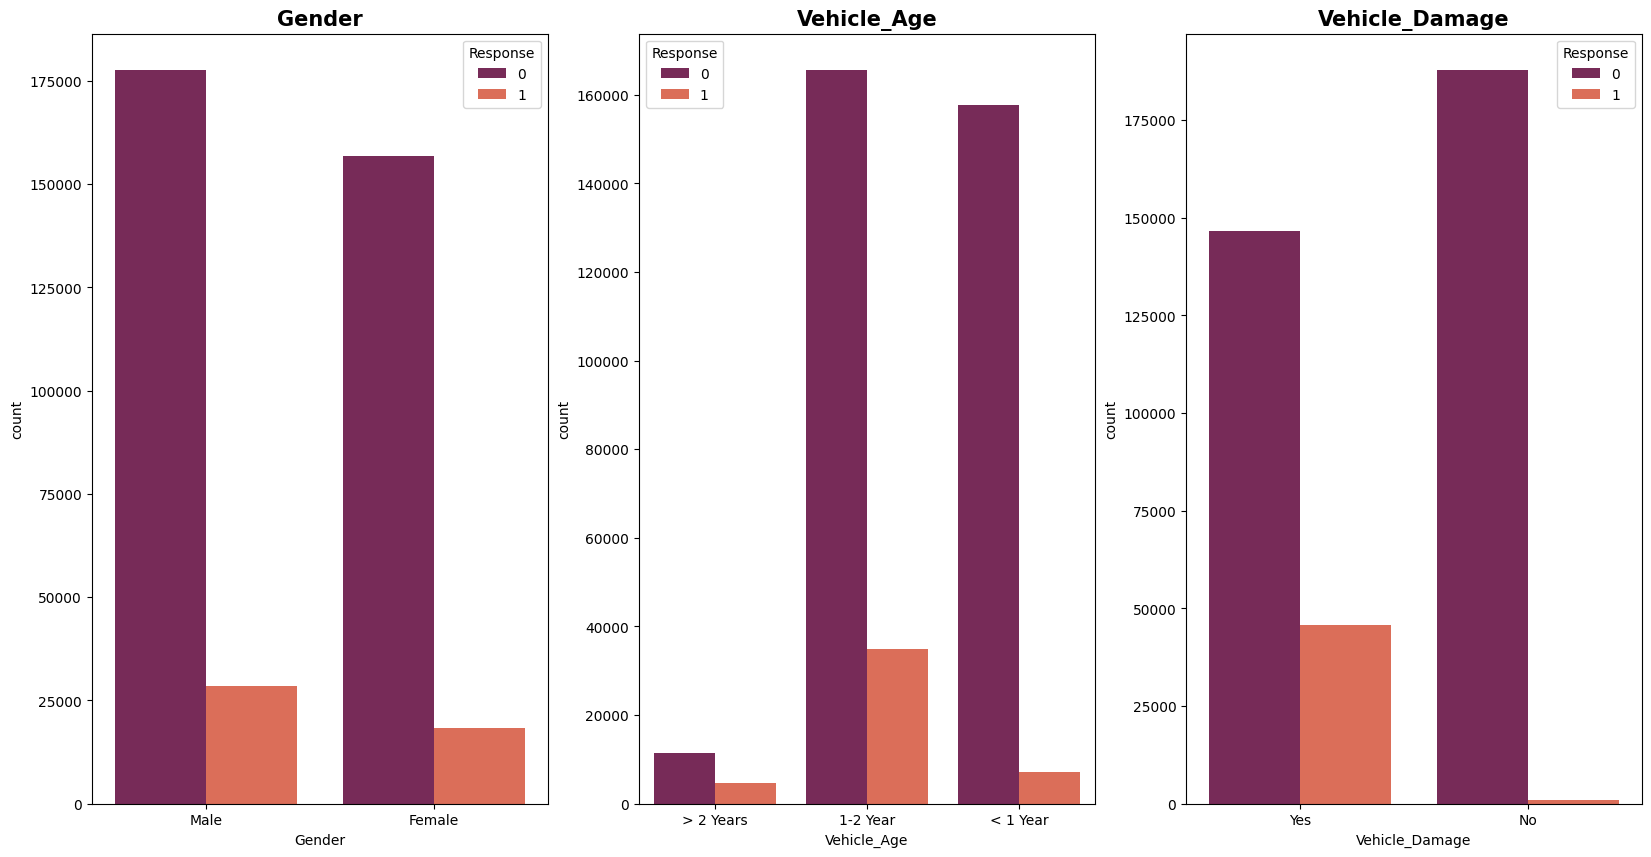

In [ ]:
# melakukan visualisasi pada beberapa kolom kategori
plt.figure(figsize=(20, 10))
for i in range (0, len(kat)):
  plt.subplot(math.ceil(len(kat)/3), 3, i+1)
  sns.countplot(data=df, x=kat[i], hue='Response',palette = "rocket")
  plt.title(kat[i], fontsize = 15, fontweight = "bold")

## Insight ##
Berikut beberapa insight yang dapat ditarik berdasarkan hasil analisis Univariate yang diatas :
- Beberapa kolom memiliki distribusi skewed
- Beberapa kolom memiliki distribusi bimodal
- Adanya nilai outliers pada kolon annual premium hal ini perlu dilakukan analisis lebih lanjut apakah akan melakukan penanganan pada outlier tersebut atau tidak
- Kolom kategori memiliki nilai unik yang normal sebanyak jumlah garis.
- Distribusi kategori terlihat normal berdasarkan statistical summary


## Hal - Hal yang harus di follow up saat data pre-processing##
- Beberapa kolom numerik ternyata adalah kategorikal contohnya seperti (Driving license , previously insured,)
- Terdapat kolom yang bisa dikategorikan agar bisa mendapat insight untuk merekomendasikan hasil analisis seperti pengelompokan umur.



##3. Multivariate Analysis (15 poin)##

Lakukan multivariate analysis (seperti correlation heatmap dan category plots, sesuai yang diajarkan di kelas). Tuliskan hasil observasinya, seperti:
* A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?
* B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?

** Tuliskan juga jika memang tidak ada feature yang saling berkorelasi

<Axes: >

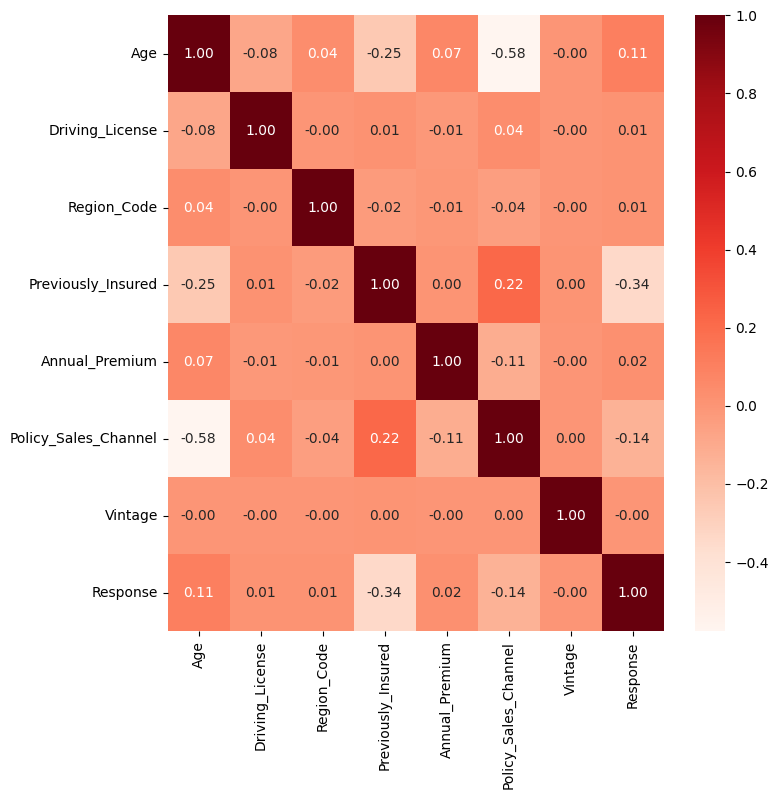

In [ ]:
# melihat korelasi antar kolom
plt.figure(figsize=(8, 8))
sns.heatmap(df_n.corr(), cmap='Reds', annot=True, fmt='.2f')

**3A. Bagaimana korelasi antara masing-masing feature dan label. Kira-kira feature mana saja yang paling relevan dan harus dipertahankan?**


*Berdasarkan heatmap di atas terlihat bahwa masing-masing feature dan label tidak memiliki korelasi yang cukup kuat. Namun, dapat dilihat pada feature Age, previously insured, dan policy sales channel memiliki nilai korelasi yang lebih tinggi dibandingkan dengan feature yang lainnya, sehingga ke tiga feature tersebut dapat dipertahankan karna cukup relevan untuk digunakan dalam analisis ini.*

**3B. Bagaimana korelasi antar-feature, apakah ada pola yang menarik? Apa yang perlu dilakukan terhadap feature itu?**

*Berdasarkan dari hasil heatmap diatas, dapat dilihat bahwa feature age dan policy sales channel memiliki pola yang cukup menarik karna berkorelasi negatif yang cukup kuat yakni (-0.58), maka dari itu yang perlu dilakukan terhadap kedua feature tersebut adalah melakukan peninjauan kembali  persebaran data pada masing-masing fitur dengan lebih mendalam.*

In [ ]:
# membuat pairplot

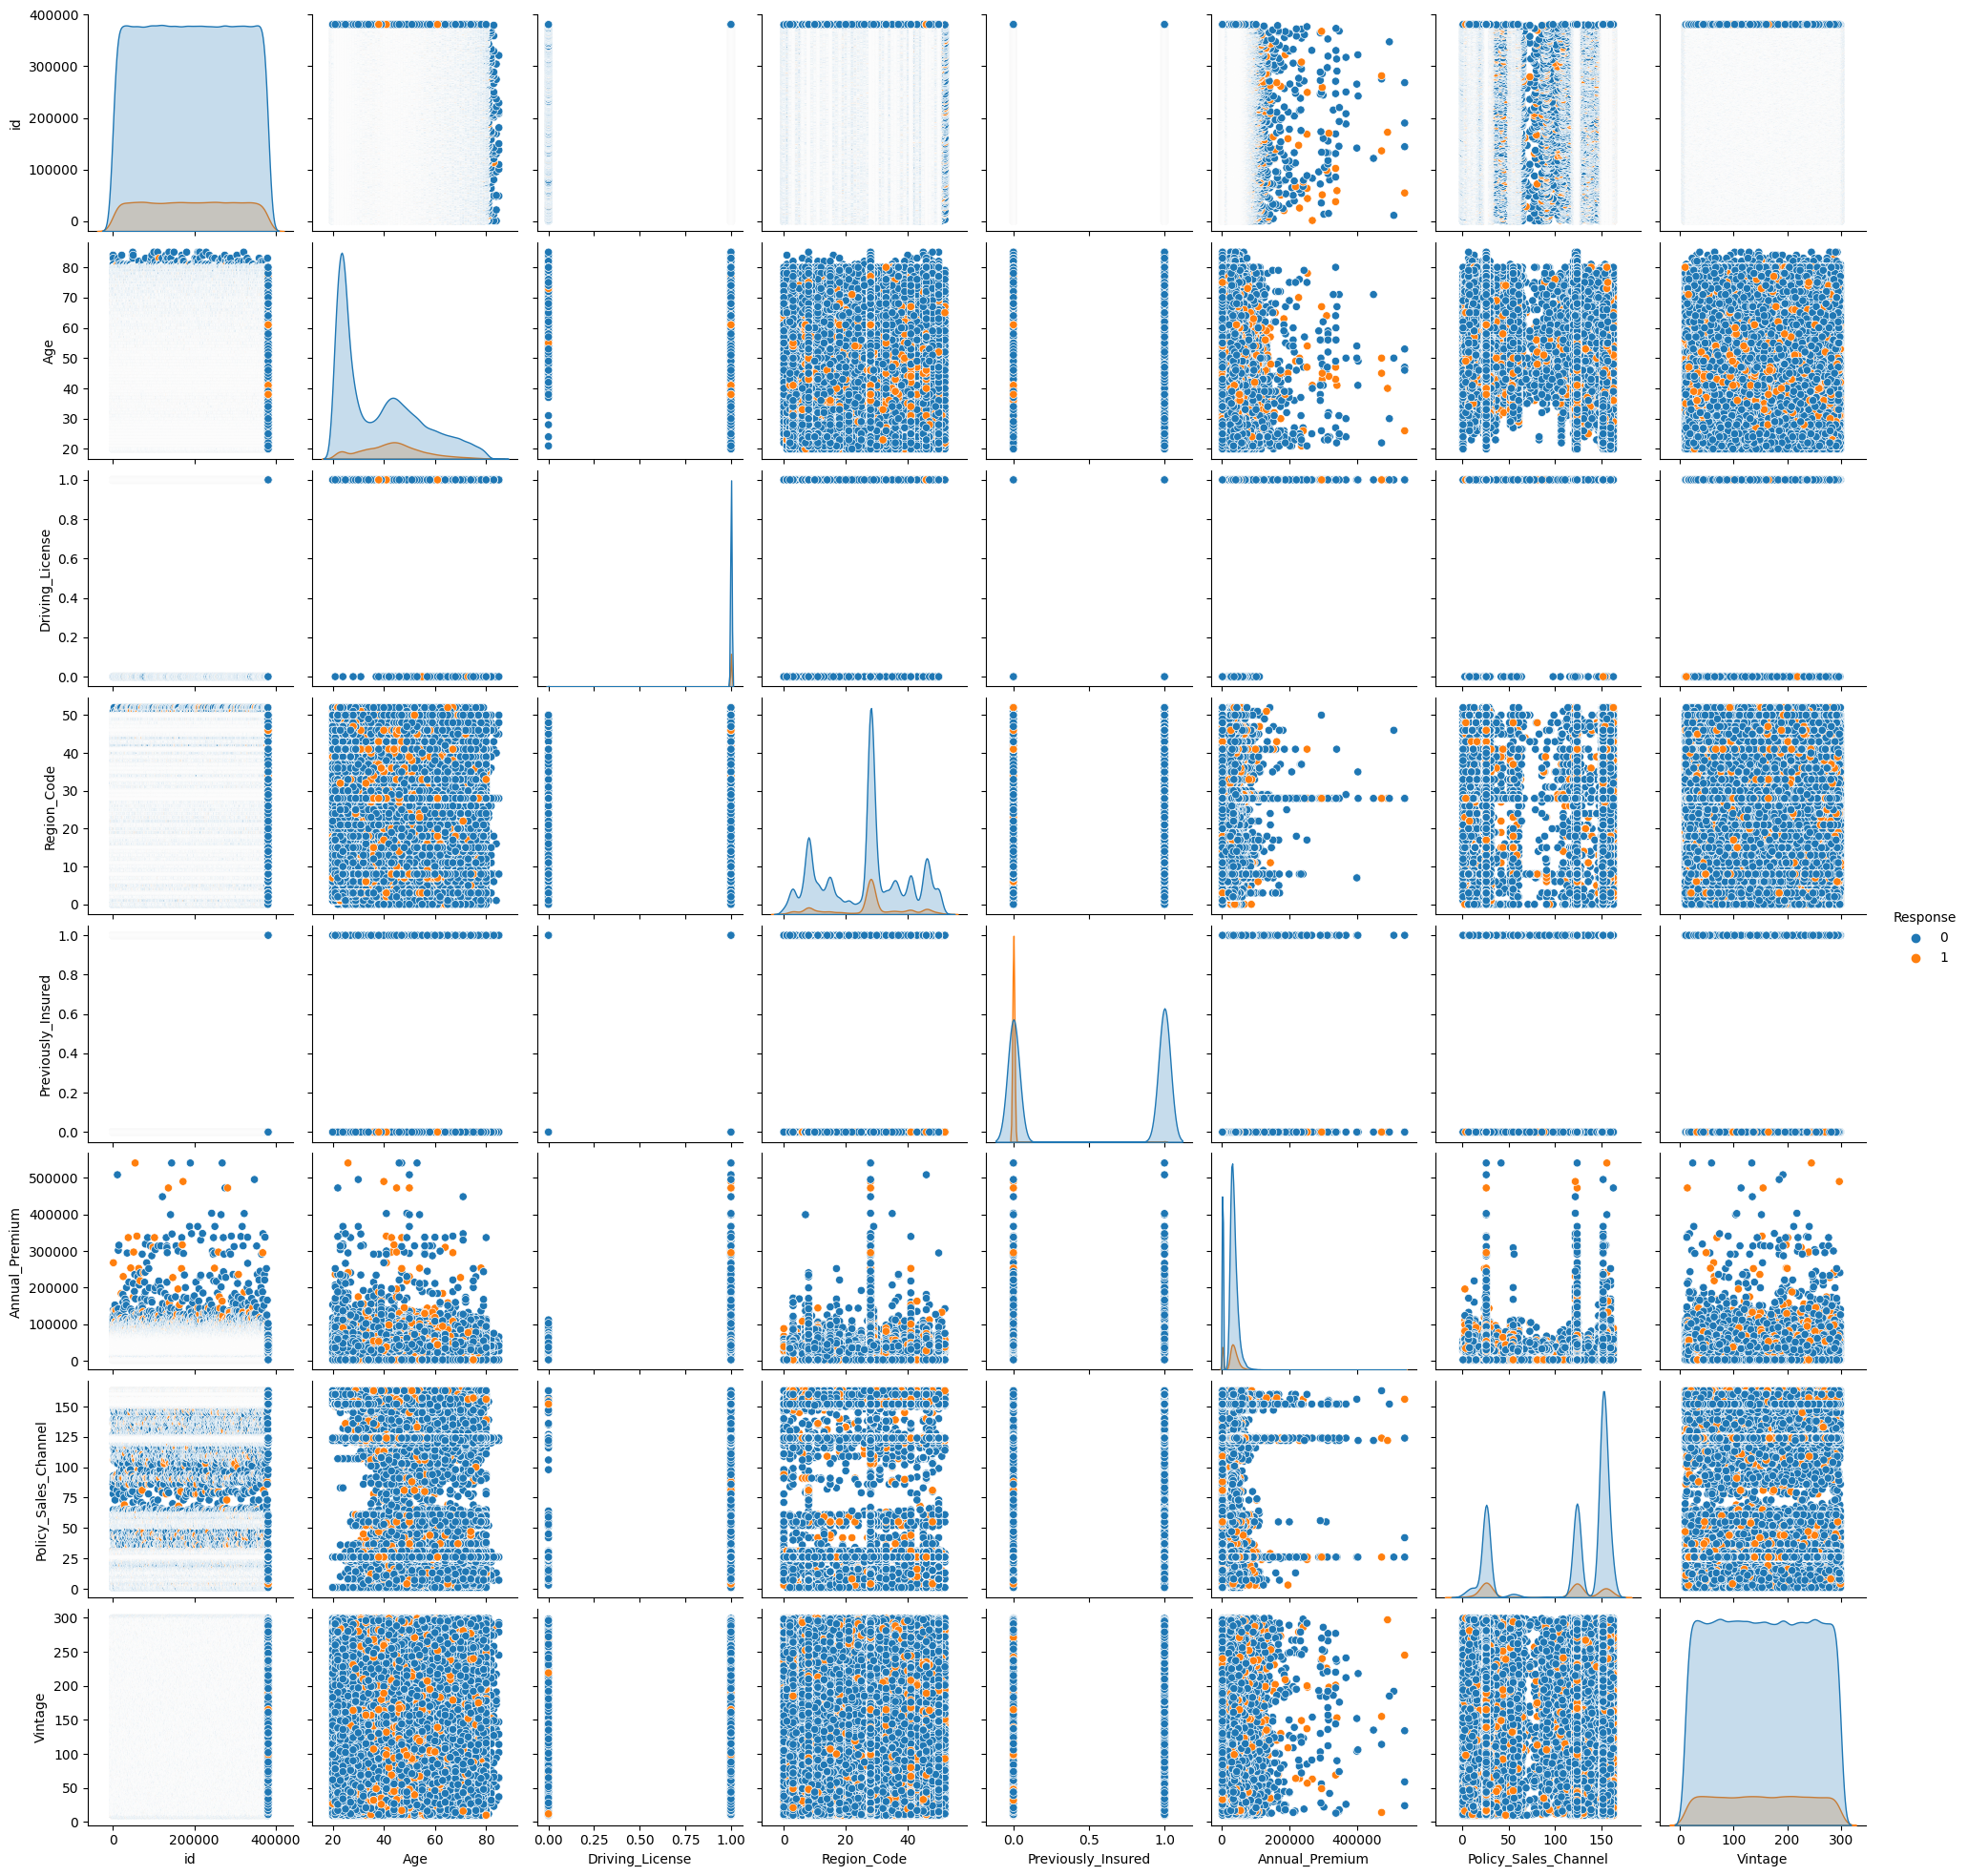

<Figure size 1000x800 with 0 Axes>

<Figure size 2077.49x2000 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 8))

sns_plot = sns.pairplot(df, diag_kind='kde', hue='Response')
sns_plot.savefig("pairplot.png")

plt.clf() # Clean parirplot figure from sns
Image(filename='pairplot.png') # Show pairplot as image

## Penjelasan Pair Plot ##
* Berdasarkan pair plot diatas tidak ada korelasi yang menarik terhadap variable target maka dari itu perlu pertimbangan untuk melakukan feature engineering.

* Beberapa korelasi feature seperti kolom Age dan region code tidak ditemukan pola apapun.

* Dari pair plot disamping sekilas dataset ini memiliki kemungkinan imbalance karena hanya condong di “response = 0”


## Insight Tambahan ##

* Kolom age dengan policy sales channel memiliki korelasi negatif yang cukup kuat (-0.58). Hal ini menunjukan orang yang berumur muda lebih mudah untuk terpengaruh oleh asuransi kendaraan yang ditawarkan oleh sales.
*Untuk customer berusia lanjut lebih sulit untuk terpengaruh oleh penawaran yang dilakukan sales, sehingga harus ada strategi khusus untuk customer berusia lanjut
*Customer berusia muda cenderung mengambil asuransi kendaraan dengan kemungkinan mereka memiliki penghasilan yang cukup besar, hal ini dapat dilihat dari annual premium yang cukup besar bagi customer berusia muda.
vintage tidak memiliki korelasi terhadap semua kolom, mungkin bisa dilakukan pertimbangan apakah layak untuk drop.

##4. Business Insight (30 poin)##

Selain EDA, lakukan juga beberapa analisis dan visualisasi untuk menemukan suatu business insight. Tuliskan minimal 3 insight, dan berdasarkan insight tersebut jelaskan rekomendasinya untuk bisnis

In [ ]:
# melakukan copy df
df1 = df.copy()
df1.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
# melakukan pengelompokan umur
df1['Age_Group'] = df1['Age'].apply(lambda x:'YoungAge' if x >= 20 and x<=45 else 'MiddleAge' if x>45 and x<=65 else 'OldAge')


## Business Insight - Age ##

Text(0.5, 1.0, 'Distribution Age Grup')

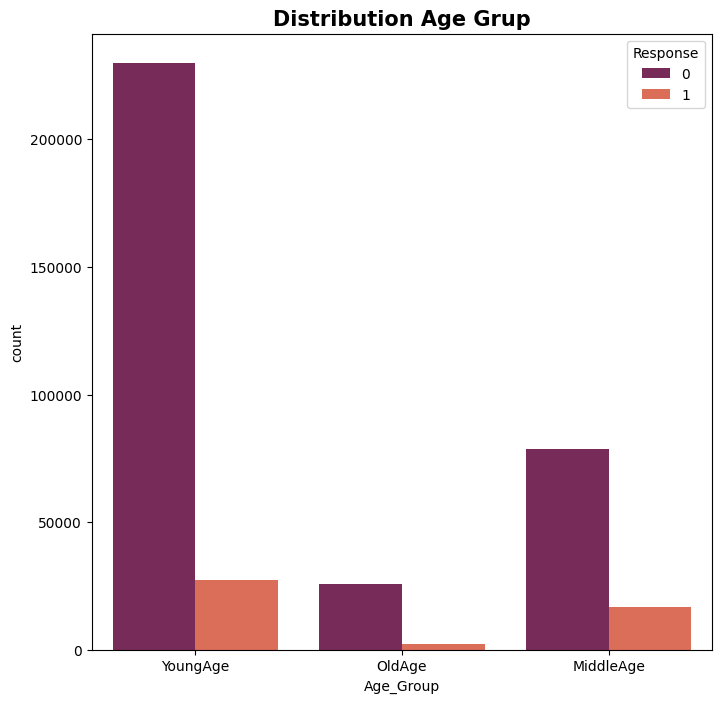

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Age
plt.figure(figsize = (8,8))
sns.countplot(x='Age_Group',hue='Response',data=df1,palette="rocket")
plt.title ("Distribution Age Grup", fontsize = 15, fontweight= "bold" )

Dapat dilihat dari distribusi kelompok umur muda lebih banyak membeli asuransi kesehatan atau kendaraan, dikarenakan pada umur yang lebih muda kemungkinan besar mereka cenderung lebih sadar akan pentingnya perlindungan finansial melalui asuransi. kelompok umur muda atau pertengahan umur sering memiliki kesadaran yang lebih tinggi tentang risiko dan dampak finansial yang dapat timbul dari peristiwa yang tidak terduga.

Hal ini juga didukung oleh protective.com dalam artikelnya yang berjudul “why you should buy life insurance when you are young” yang mengatakan bahwa kelompok umur muda lebih banyak membeli asuransi karena dua faktor sebagai berikut:

* Cheaper & Healthier

Secara umum, semakin muda umur kita maka akan semakin sedikit kita akan membayar premi, karena kelompok umur muda memiliki risiko yang lebih kecil daripada seseorang yang jauh lebih tua secara kondisi kesehatan, karena kelompok umur muda cenderung memiliki kesehatan yang prima dan belum ada penyakit yang kronis sehingga premi asuransi secara signifikan akan lebih rendah pada usia kelompok umur muda.

* Get More Coverage for the Future

Secara coverage kelompok umur muda juga memiliki coverage yang lebih luas di masa depan, karena selain mempunyai life expectancy yang jauh lebih panjang dibandingkan kelompok umur yang lebih tua, kelompok umur muda juga dapat lebih mudah untuk membeli premi asuransi tambahan di masa depan ketika kelompok umur muda menikah dan mempunyai anak


## Rekomendasi Business Insight - Age ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk lebih bisa memfokuskan marketing campaign pada kedua kelompok umur tersebut agar bisa mendapat kan revenue yang maksimal dan bisa memaksimal conversion rate dari kedua kelompok umur tersebut.

## Business Insight - Gender ##

Text(0.5, 1.0, 'Distribution Gender')

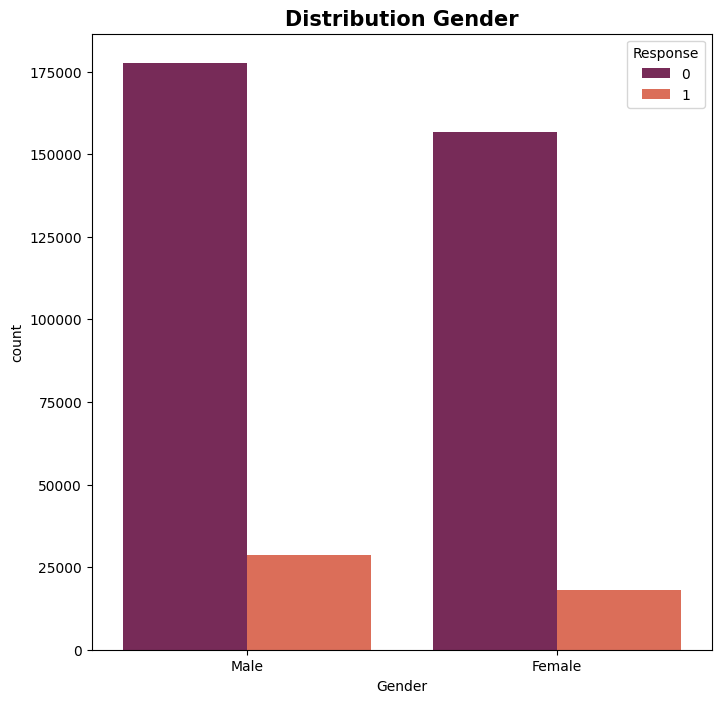

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Gender
plt.figure(figsize = (8,8))
sns.countplot(x='Gender',hue='Response',data=df,palette="rocket")
plt.title ("Distribution Gender", fontsize = 15, fontweight= "bold" )

Dapat dilihat dari grafik bahwa customer pria lebih banyak dibandingkan perempuan karena pria cenderung untuk diasuransikan dan membeli asuransi untuk keamanan jangka panjang dibandingkan perempuan.

Customer pria memiliki jumlah lebih besar daripada customer perempuan juga didukung dari dua penelitian sebagai berikut:

* Penelitian Asuransi Jiwa:

Menurut studi tahun 2021 oleh LIMRA dan Life Happens, hanya 47% wanita yang memiliki polis asuransi jiwa dibandingkan dengan 58% pria. Hal ini disebabkan primary provider secara historis adalah seorang pria yang lebih cenderung mendapatkan polis asuransi melalui pemberi kerja/perusahaan mereka dibandingkan dengan perempuan yang secara statistik penelitian mayoritas belum bekerja penuh waktu untuk memenuhi syarat mendapatkan tunjangan asuransi dari pemberi kerja/perusahaan.
* Penelitian Asuransi Kendaraan:

Menurut penelitian dari AAA Foundation for Traffic Safety,yang meneliti perilaku pengemudi Amerika, pria lebih banyak diasuransikan karena pria cenderung lebih berisiko untuk mengalami kecelakaan. Hal ini disebabkan pria lebih rentan dalam mengalami kecelakaan kendaraan karena faktor seperti perilaku mengemudi yang agresif, mengantuk, mabuk , tidak memakai sabuk pengaman, kelelahan dan faktor lain nya yang tingkat kecelakaan nya lebih tinggi daripada pengemudi perempuan.


## Rekomendasi Business Insight - Gender ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk memfokuskan marketing pada customer pria dibandingkan perempuan, dan meskipun begitu perusahaan juga  bisa melakukan targeted marketing campaign yang secara konten lebih cocok ke perempuan untuk bisa juga memaksimalkan potensi revenue yang bisa didapatkan dari dari customer yang berjenis kelamin perempuan.

## Business Insight - Driving License ##

<Axes: xlabel='Driving_License', ylabel='count'>

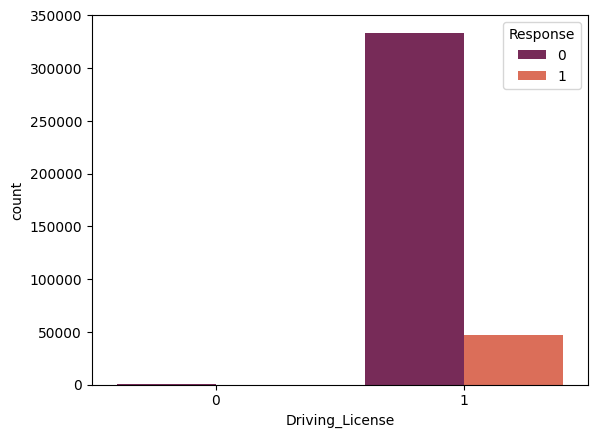

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Driving License
sns.countplot(x='Driving_License',hue='Response',data=df,palette="rocket")

Dapat dilihat dari grafik bahwa customer yang memiliki SIM lebih cenderung tertarik (Response=“1”) membeli asuransi kendaraan dibandingkan dengan customer yang tidak memiliki SIM, karena customer yang memiliki SIM cenderung lebih mengetahui kewajiban dan manfaat dari asuransi kendaraan daripada customer yang tidak memiliki SIM. Selain itu customer yang memiliki SIM tentu nya dapat lebih mudah mengajukan permohonan asuransi daripada customer yang tidak mempunyai SIM.

Customer yang memiliki SIM lebih cenderung tertarik membeli asuransi kendaraan dan mempunyai kemudahan mengajukan asuransi dibandingkan dengan customer yang tidak memiliki SIM juga didukung dari bankrate.com dalam artikel nya yang berjudul  “can you get insurance with no driving license” karena faktor sebagai berikut:

* Kewajiban Secara Hukum

Secara umum asuransi kendaraan diwajibkan secara hukum untuk pemilik kendaraan di sebagian besar negara. Salah satu syarat yang paling utama untuk mendapatkan asuransi kendaraan adalah SIM. Sehingga customer yang memiliki SIM sudah pasti cenderung lebih tahu kewajiban dan manfaat untuk mempunyai asuransi kendaraan sehingga  akan lebih tertarik untuk membeli asuransi kendaraan.
* Proses Pengajuan Asuransi

Mendapatkan asuransi mungkin dapat menjadi proses yang lebih rumit jika kita tidak memiliki SIM. Hal ini menjadikan customer yang tidak memiliki SIM menjadi tidak tertarik memiliki asuransi karena proses yang dilalui cukup rumit serta memakan waktu dan biaya dibandingkan dengan customer yang memiliki SIM.


## Rekomendasi Business Insight - Driving License ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk untuk membuat strategi komunikasi marketing campaign kepada pemegang SIM yang belum mempunyai asuransi kendaraan, untuk melakukan promosi yang dapat mempermudah proses pengajuan asuransi kendaraan (seperti pengajuan asuransi online) agar customer tertarik untuk membeli asuransi.

## Business Insight - Previously Insured ##

<Axes: xlabel='Previously_Insured', ylabel='count'>

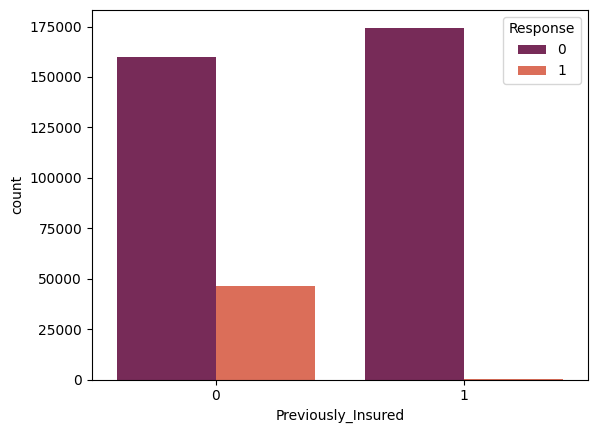

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Previously Insured
sns.countplot(x='Previously_Insured',hue='Response',data=df,palette="rocket")

Dapat dilihat dari grafik bahwa customer yang belum memiliki asuransi kendaraan (Previously_Insured=”0”) cenderung lebih tertarik untuk membeli asuransi (Response=“1”) dibandingkan dengan customer yang sudah memiliki asuransi kendaraan (Previously_Insured=”1”) karena customer yang sudah memiliki asuransi cenderung tidak akan membeli produk asuransi yang sama kembali.

Customer yang belum memiliki asuransi kendaraan cenderung lebih tertarik untuk membeli asuransi dibandingkan dengan customer yang sudah memiliki asuransi kendaraan juga didukung oleh analyticsvidhya.com dalam artikelnya yang berjudul  “Cross-Sell Prediction Using Machine Learning in Python” yang menyatakan bahwa:

* Pada dasarnya customer hanya ingin memiliki satu asuransi kendaraan saja, karena apabila customer sudah memiliki asuransi kendaraan, customer tidak akan mempertimbangkan untuk membeli asuransi kendaraan lain nya karena akan dirasa redundant dan tidak efektif serta efisien dalam segi biaya dan waktu.

* Artinya customer yang sudah memiliki asuransi kendaraan tidak akan berkonversi ke asuransi kendaraan yang ditawarkan oleh perusahaan dalam dataset.

* Dua hal diatas menyebabkan fokus dalam rekomendasi akan lebih berfokus pada customer yang belum memiliki asuransi kendaraan, untuk dapat memaksimalkan usaha strategi komunikasi perusahaan dalam menjangkau potensi revenue yang lebih optimal dari customer yang cenderung lebih tertarik dengan asuransi kendaraan(customer yang belum mempunyai asuransi kendaraan)


## Rekomendasi Business Insight - Previously Insured ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk merekomendasikan untuk melakukan targeted atau personalized content yang berfokus kepada customer yang belum memiliki asuransi kendaraan, dengan cara melakukan campaign yang berfokus pada edukasi keamanan membeli asuransi untuk keamanan jangka panjang agar customer berminat untuk membeli asuransi.

## Business Insight - Vehicle Age ##

Text(0.5, 1.0, 'Distribution vehicle age')

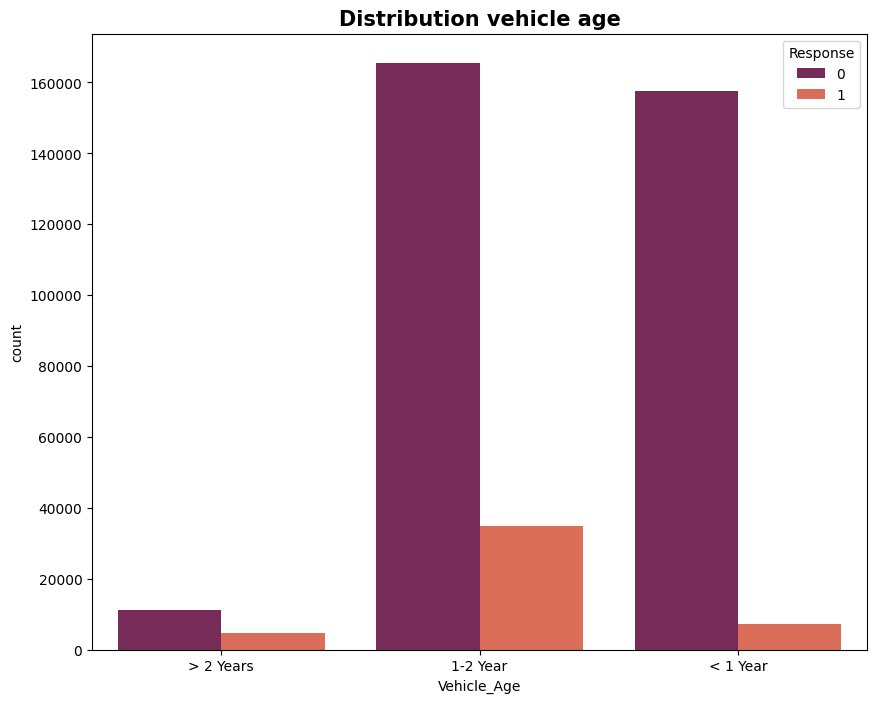

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Vehicle Age
plt.figure(figsize=(10, 8))
sns.countplot(x = 'Vehicle_Age', hue='Response', data = df, palette="rocket")
plt.title ("Distribution vehicle age", fontsize = 15, fontweight= "bold" )

Dapat dilihat dari grafik bahwa customer yang memiliki atau tertarik dengan asuransi merupakan customer yang mempunyai usia kendaraan yang kurang dari 2 tahun (1-2 Year dan < 1 Year), karena mereka akan cenderung lebih merawat kendaraan baru yang dimiliki.

Hal ini juga didukung oleh forbes.com dalam artikelnya yang berjudul “advisor/car-insurance/new-car-replacement” yang menyatakan bahwa kendaraan baru lebih banyak memiliki asuransi, karena hal sebagai berikut:

* Penurunan nilai/Depresiasi nilai kendaraan dapat merugikan customer disaat customer mengalami kecelakaan tak lama setelah customer membeli mobil baru. Perusahaan asuransi kemungkinan besar akan mengganti nilai kendaraan dibawah harga beli karena karena depresiasi dan kecelakaan tersebut, sehingga klaim yang dibayarkan tidak cukup untuk mengcover nilai kendaraan customer, sehingga disarankan untuk mempunyai asuransi kendaraan, seperti contoh nya adalah “asuransi penggantian mobil baru”.

* Asuransi penggantian mobil baru memberi customer uang untuk mobil baru dengan merek dan model yang sama (dikurangi deductibles) dan alih nilai depresiasi total kendaraan customer. Hal ini membuat customer lebih tertarik karena kendaraan lebih terjamin saat menggunakan asuransi.


## Rekomendasi Business Insight - Vehicle Age ##

Berdasarkan insight diatas, maka perusahaan direkomendasikan untuk melakukan targeted atau personalized content yang berfokus kepada customer dengan dengan usia kendaraan kurang dari 2 tahun (1-2 Year dan < 1 Year), karena mereka akan lebih tertarik untuk merawat kendaraan,dikarenakan customer cenderung akan merawat kendaraan baru yang dimiliki sehingga hal ini dapat dimanfaatkan oleh perusahaan untuk gencar melakukan promosi asuransi pada customer yang baru saja membeli kendaraan.


## Business Insight - Vehicle Damage ##



<Axes: xlabel='Vehicle_Damage', ylabel='count'>

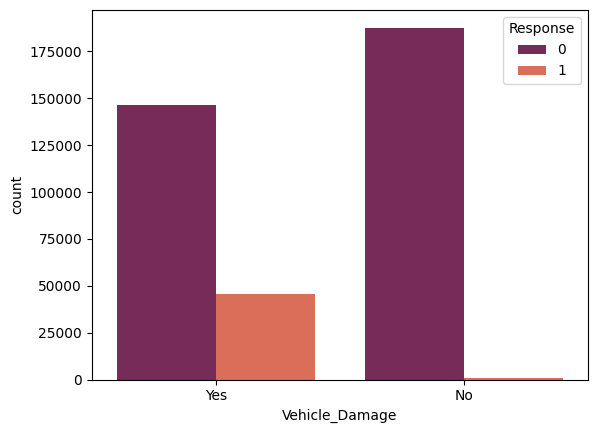

In [ ]:
# melakukan visualisasi untuk mendapatkan insight dari kolom Vehicle Damage
sns.countplot(x='Vehicle_Damage',hue='Response',data=df,palette="rocket")

Dapat dilihat dari grafik bahwa customer yang kendaraan nya pernah mengalami kerusakan (Vehicle_Damage=”1”) cenderung lebih tertarik untuk membeli asuransi (Response=“1”) dibandingkan dengan customer yang kendaraan nya belum pernah mengalami kerusakan (Vehicle_Damage=”1”) karena customer yang kendaraan nya pernah mengalami kerusakan cenderung lebih mengetahui biaya yang perlu dikeluarkan saat kendaraan mengalami kerusakaan apabila menggunakan asuransi dan tidak menggunakan asuransi.

Customer yang kendaraan nya pernah mengalami kerusakan cenderung lebih tertarik untuk membeli asuransi dibandingkan dengan customer yang kendaraan nya belum pernah mengalami kerusakan juga didukung oleh analyticsvidhya.com dalam artikelnya yang berjudul  “Cross-Sell Prediction Using Machine Learning in Python” yang menyatakan bahwa:

* Customer yang kendaraan nya pernah rusak cenderung lebih memiliki pengalaman dan pengetahuan dari segi cost yang harus dikeluarkan untuk memperbaiki kendaraan nya. Dari segi pengalaman customer, apabila menggunakan asuransi, cost yang dikeluarkan jauh lebih murah daripada saat tidak menggunakan asuransi, karena saat menggunakan asuransi kendaraan, customer dapat mendapatkan klaim dari asuransi disaat kendaraan mereka rusak, sedangkan apabila tidak menggunakan asuransi, customer akan menanggung biaya perbaikan nya sendiri (yang jauh lebih mahal).

* Sehingga customer yang kendaraan nya pernah rusak akan lebih berpeluang untuk berkonversi ke asuransi kendaraan yang ditawarkan oleh perusahaan dalam dataset.


## Rekomendasi Business Insight - Vehicle Damage ##

Berdasarkan insight diatas, perusahaan direkomendasikan untuk melakukan targeted atau personalized content yang berfokus kepada customer yang kendaraan nya pernah mengalami kerusakaan namun belum mempunyai asuransi kendaraan, sehingga customer akan semakin banyak yang berkonversi.

##5. Git (15 poin)##

Upload project teman-teman di sebuah repository git. Berkolaborasilah di Git jika ada perubahan version dari waktu ke waktu.

* A. Buat Repository Git

* B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut

Untuk file README, dapat merupakan summary insight yang telah didapatkan dari EDA.


**5A. Buat Repository Git**


*Repository Git sudah dibuat di link sebagai berikut: https://github.com/fauzanheryka/Data_Connector*

**5B. Upload file notebook atau file pengerjaan lainnya pada repository tersebut**

*File notebook dan README telah diupload di repository git:
https://github.com/fauzanheryka/Data_Connector.*